# Introduction:



### Lending Club enables borrowers to create unsecured personal loans. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.


#### In this project one has to put themself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

# Loan Default Prediction

##### Project by <b>Pushkar Raj </b>

# Loading the text data

    
    

In [1]:
# Setting the path to my local directory where my dataset is placed

import os
os.chdir('E:\\Finale Project\\Python Project')
print (os.getcwd())

E:\Finale Project\Python Project


In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing,metrics 
%matplotlib inline
from IPython.display import Image
# utils import
from fuzzywuzzy import fuzz


In [3]:
# Loading the data from txt file
data = pd.read_csv('XYZCorp_LendingData.txt',sep="\t")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Checking dimension of data
data.shape

(855969, 73)

In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

##### Although we are having 73 features here but all of them won't be available to the investor while deciding whether to loan or not.So we'll drop some of the features from this dataset.

## Displaying the data

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Cleaning

### 1. Removing all the features with more than 30% of their data missing (coz it doesn't make sense).
### 2. choosing  those features that would be available to the investor before deciding whether to fund the loan.

####  Removing all the features with more than 30% of their data missing.

In [12]:
missing_feature = df.isnull().mean().sort_values(ascending=False)
missing_feature.head(10)


dti_joint                    0.999486
verification_status_joint    0.999484
annual_inc_joint             0.999484
il_util                      0.986438
mths_since_rcnt_il           0.984890
total_bal_il                 0.984476
inq_last_12m                 0.984476
open_acc_6m                  0.984476
open_il_6m                   0.984476
open_il_24m                  0.984476
dtype: float64

Text(0, 0.5, 'Feature count')

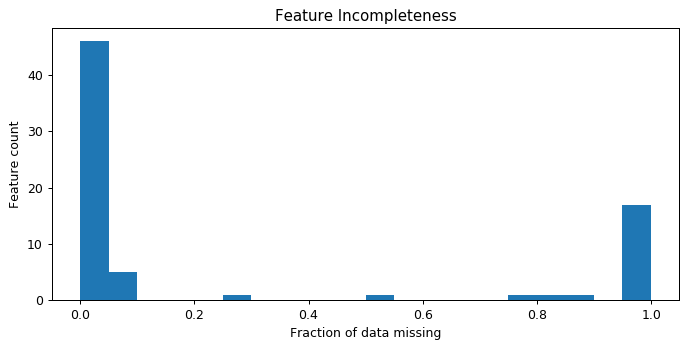

In [13]:
plt.figure(figsize=(9,4), dpi=90)
missing_feature.plot.hist(bins=20)
plt.title('Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

##### As there's a large gap between features missing data (<20%) and those missing data (>40%). it's generally very difficult to accurately impute the value  with features more than 30% missing value. So in the next step we'll drop them. 

In [14]:
drop_list = sorted(list(missing_feature[missing_feature > 0.3].index))
print(drop_list) #How many features would be dropped?
(len(drop_list))


['all_util', 'annual_inc_joint', 'desc', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'total_bal_il', 'total_cu_tl', 'verification_status_joint']


21

In [15]:
# Drop these values
df.drop(labels=drop_list, axis=1, inplace=True)

In [16]:
df.shape

(855969, 52)

#####  Keeping only those features which would be known to the potential investor.

In [17]:
print(sorted(df.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'default_ind', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'member_id', 'next_pymnt_d', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'verification_status', 'zip_code']


In [27]:
keep_list = ['addr_state', 'annual_inc','application_type', 'dti', 'emp_length', 'emp_title', 
             'grade', 'home_ownership', 'initial_list_status', 'installment', 
             'int_rate', 'issue_d', 'loan_amnt','open_acc', 'pub_rec','purpose', 'revol_bal', 'revol_util',
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
             'default_ind'] 

In [28]:
len(keep_list)

27

In [29]:
drop_list = [col for col in df.columns if col not in keep_list]
print(drop_list)

['earliest_cr_line']


In [30]:
len(drop_list)

1

In [31]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [32]:
df.shape

(855969, 26)

In [33]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'default_ind'],
      dtype='object')

In [35]:
df.head(7)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,default_ind
0,1077501,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,...,AZ,27.65,3.0,0.0,13648.0,83.7,9.0,f,INDIVIDUAL,0
1,1077430,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,GA,1.00,3.0,0.0,1687.0,9.4,4.0,f,INDIVIDUAL,1
2,1077175,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,...,IL,8.72,2.0,0.0,2956.0,98.5,10.0,f,INDIVIDUAL,0
3,1076863,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,CA,20.00,10.0,0.0,5598.0,21.0,37.0,f,INDIVIDUAL,0
4,1075358,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,...,OR,17.94,15.0,0.0,27783.0,53.9,38.0,f,INDIVIDUAL,0
5,1075269,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,AZ,11.20,9.0,0.0,7963.0,28.3,12.0,f,INDIVIDUAL,0
6,1069639,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,...,NC,23.51,7.0,0.0,17726.0,85.6,11.0,f,INDIVIDUAL,0


In [42]:
len(df.emp_title.unique())

290913

## Response Variable
 

In [21]:
df['default_ind'].value_counts(dropna=False)

0    809502
1     46467
Name: default_ind, dtype: int64

## EDA(Exploratory Data Analysis) and Pre-Processing 

#### In this secction I will inspect each feature individually, which woulf include the following steps

##### Drop the variable if the feature is not useful for predicting the default index.
##### Looking at the summary statistics and visualizing the datapoint and plotting it against the default index.
##### Altering the variable  to turn it into a useful feature for the modeling purpose(if it's required).



In [22]:
# Let's create a function for the shake of plotting a feature and comparing it with our default index.

def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without default Index
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with default Index
    if continuous:
        sns.boxplot(x=col_name, y='default_ind', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by default_ind')
    else:
        charge_off_rates = df.groupby(col_name)['default_ind'].value_counts(normalize=True).loc[:,'default_ind']
        sns.barplot(x=default_ind, y=default_ind.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


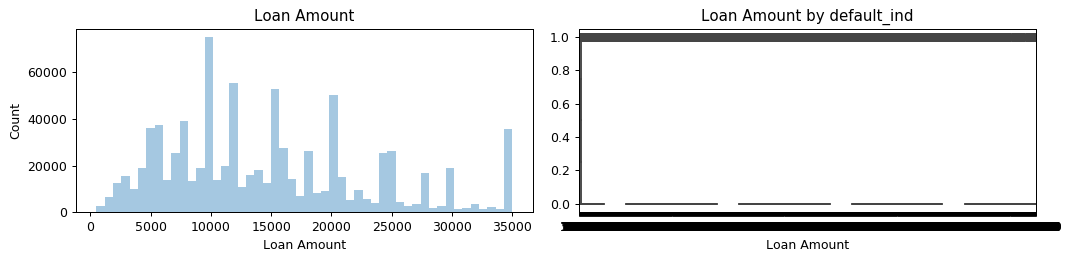

In [23]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

# Data Exploration


In [42]:
df.describe()

,id,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,default_ind
count,8.559690e+05,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000
mean,3.224073e+07,14745.571335,13.192320,436.238072,7.507119e+04,18.122165,11.542447,0.194537,1.691053e+04,55.019405,25.269269,0.054286
std,2.271969e+07,8425.340005,4.368365,243.726876,6.426447e+04,17.423629,5.308094,0.581585,2.222374e+04,23.811585,11.818841,0.226581
min,5.473400e+04,500.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,9.067986e+06,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000
50%,3.431355e+07,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,0.000000
75%,5.446311e+07,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,0.000000
max,6.861687e+07,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,1.000000


In [43]:
df.shape

(855969, 27)

In [22]:
# Ordinal Features: 
print(f'Grade   : {df.grade.unique()}')
print(f'Sub_grade: {df.sub_grade.unique()}')
print(f'Emp_length: {df.emp_length.unique()}')
print(f'delinq_2yrs: {df.delinq_2yrs.unique()}')

Grade   : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Sub_grade: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
Emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
delinq_2yrs: [ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. 15. 10. 12. 17. 18. 13. 29.
 24. 14. 22. 19. 16. 21. 30. 26. 20. 27. 39.]
recoveries: [    0.     117.08   189.06 ... 21941.26  1413.48  5834.18]


In [23]:
# Categorical Features:
print(f'Home_ownership: {df.home_ownership.unique()}')
print(f'Verification_status: {df.verification_status.unique()}')
print(f'Inq_last_6mths: {df.inq_last_6mths.unique()}')
print(f'Pymnt_plan : {df.pymnt_plan .unique()}')
print(f'Acc_now_delinq: {df.acc_now_delinq.unique()}')
print(f'Term: {df.term.unique()}')
print(f'Purpose : {df.purpose.unique()}')
print(f'Title: {df.title.unique()}')
print(f'Application_type: {df.application_type.unique()}')
print(f'Acc_now_delinq: {df.acc_now_delinq.unique()}')
print(f'Default_ind: {df.default_ind.unique()}')
print(f'Collections_12_mths_ex_med: {df.collections_12_mths_ex_med.unique()}')
print(f'Policy_code: {df.policy_code.unique()}')
print(f'acc_now_delinq: {df.acc_now_delinq.unique()}')
print(f'addr_state: {df.mths_since_rcnt_il.unique()}')

 

Home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Verification_status: ['Verified' 'Source Verified' 'Not Verified']
Inq_last_6mths: [1. 5. 2. 0. 3. 4. 6. 7. 8.]
Pymnt_plan : ['n' 'y']
Acc_now_delinq: [ 0.  1.  2.  3.  5.  4.  6. 14.]
Term: [' 36 months' ' 60 months']
Purpose : ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
Title: ['Computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'New Baby and New House (CC Consolidate)' 'Credit Card/Auto Repair']
Application_type: ['INDIVIDUAL' 'JOINT']
Acc_now_delinq: [ 0.  1.  2.  3.  5.  4.  6. 14.]
Default_ind: [0 1]
Collections_12_mths_ex_med: [ 0. nan  1.  2.  3.  4.  6. 16. 20.  5.  7. 10. 14.]
Policy_code: [1.]
acc_now_delinq: [ 0.  1.  2.  3.  5.  4.  6. 14.]
addr_state: [ nan  28.   2.  45.  12.   3.   5.  19.   6.  82.  25.   7.  56.  20.
   9.  14.  29.  47.  10. 148.

In [42]:
df['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [44]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [43]:
df['funded_amnt'].describe()

count    855969.000000
mean      14732.378305
std        8419.471653
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [44]:
df['funded_amnt_inv'].describe()

count    855969.000000
mean      14700.061226
std        8425.805478
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64

In [45]:
df['int_rate'].describe()   

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

In [46]:
df['installment'].describe()

count    855969.000000
mean        436.238072
std         243.726876
min          15.690000
25%         260.550000
50%         382.550000
75%         571.560000
max        1445.460000
Name: installment, dtype: float64

In [47]:
df['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [48]:
df['dti'].describe()

count    855969.000000
mean         18.122165
std          17.423629
min           0.000000
25%          11.880000
50%          17.610000
75%          23.900000
max        9999.000000
Name: dti, dtype: float64

In [49]:
df['revol_bal'].describe()          

count    8.559690e+05
mean     1.691053e+04
std      2.222374e+04
min      0.000000e+00
25%      6.469000e+03
50%      1.190300e+04
75%      2.085700e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [50]:
df['revol_util'].describe()        

count    855523.000000
mean         55.019405
std          23.811585
min           0.000000
25%          37.600000
50%          55.900000
75%          73.500000
max         892.300000
Name: revol_util, dtype: float64

In [51]:
df['total_acc'].describe()     

count    855969.000000
mean         25.269269
std          11.818841
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [52]:
df['out_prncp'].describe()                 

count    855969.000000
mean       8284.830230
std        8461.946669
min           0.000000
25%           0.000000
50%        6290.250000
75%       13528.800000
max       49372.860000
Name: out_prncp, dtype: float64

In [53]:
df['out_prncp_inv'].describe()      

count    855969.000000
mean       8281.449347
std        8458.496422
min           0.000000
25%           0.000000
50%        6287.650000
75%       13522.510000
max       49372.860000
Name: out_prncp_inv, dtype: float64

In [54]:
df['total_pymnt'].describe()

count    855969.000000
mean       7653.296336
std        7909.383591
min           0.000000
25%        1969.690000
50%        4976.160000
75%       10744.803649
max       57777.579870
Name: total_pymnt, dtype: float64

In [55]:
df['total_pymnt_inv'].describe()

count    855969.00000
mean       7622.22052
std        7885.15640
min           0.00000
25%        1960.12000
50%        4948.25000
75%       10697.33000
max       57777.58000
Name: total_pymnt_inv, dtype: float64

In [56]:
df['total_rec_prncp'].describe()     total_rec_int

count    855969.000000
mean       5850.841088
std        6676.410888
min           0.000000
25%        1239.950000
50%        3286.890000
75%        8000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [57]:
df['total_rec_int'].describe()

count    855969.000000
mean       1755.046221
std        2081.692980
min           0.000000
25%         451.270000
50%        1076.910000
75%        2233.980000
max       24205.620000
Name: total_rec_int, dtype: float64

In [58]:
df['total_rec_late_fee'].describe()

count    855969.000000
mean          0.319530
std           3.609399
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

In [59]:
df['recoveries'].describe()

count    855969.000000
mean         47.089499
std         413.136043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [60]:
df['collection_recovery_fee'].describe()

count    855969.000000
mean          4.951227
std          62.478569
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [62]:
df['last_pymnt_amnt'].describe()

count    855969.000000
mean       2225.985295
std        4864.966593
min           0.000000
25%         285.420000
50%         468.820000
75%         849.160000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64

0    809502
1     46467
Name: default_ind, dtype: int64


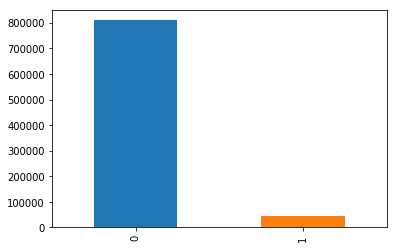

In [67]:
# default_ind
default_ind_count = df['default_ind'].value_counts()
print(default_ind_count)
default_ind_count.plot.bar()

In [68]:
type(default_ind_count)

pandas.core.series.Series

In [69]:
default_ind_count.values

array([809502,  46467], dtype=int64)

In [70]:
default_ind_count.index

Int64Index([0, 1], dtype='int64')

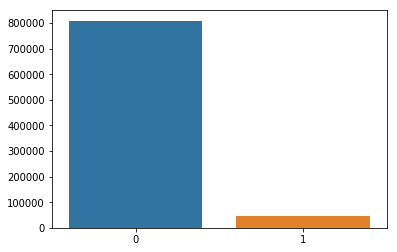

In [71]:
# Alternative way of plotting using Seaborn
sns.barplot(default_ind_count.index, default_ind_count.values)

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64


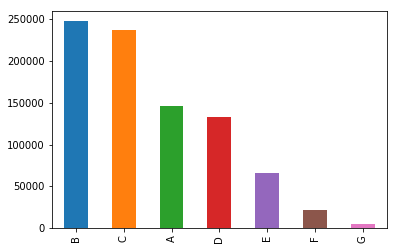

In [72]:
# grade
grade_count = df['grade'].value_counts()
print(grade_count)
grade_count.plot.bar()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64


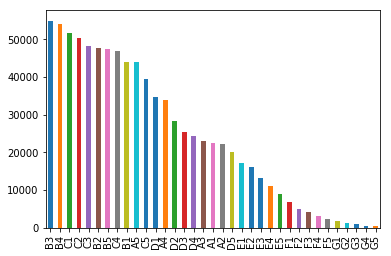

In [73]:
# sub_grade
sub_grade_count = df['sub_grade'].value_counts()
print(sub_grade_count)
sub_grade_count.plot.bar()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64


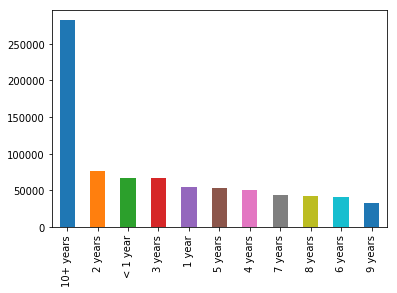

In [74]:
# emp_length
emp_length_count = df['emp_length'].value_counts()
print(emp_length_count)
emp_length_count.plot.bar()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64


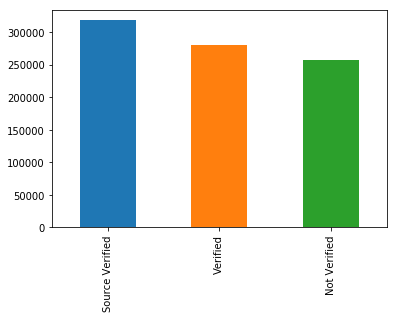

In [75]:
# verification_status
verification_status_count = df['verification_status'].value_counts()
print(verification_status_count)
verification_status_count.plot.bar()

n    855964
y         5
Name: pymnt_plan, dtype: int64


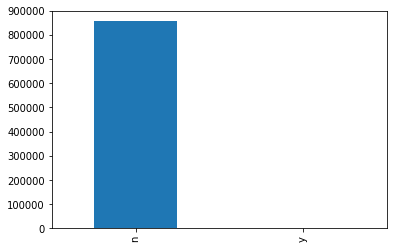

In [76]:
# pymnt_plan
pymnt_plan_count = df['pymnt_plan'].value_counts()
print(pymnt_plan_count)
pymnt_plan_count.plot.bar()

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64


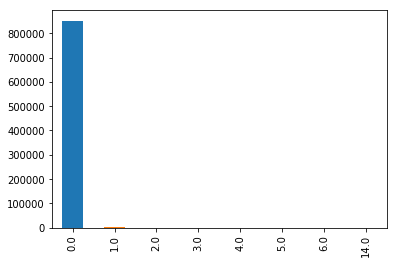

In [77]:

# acc_now_delinq
acc_now_delinq_count = df['acc_now_delinq'].value_counts()
print(acc_now_delinq_count)
acc_now_delinq_count.plot.bar()

 36 months    600221
 60 months    255748
Name: term, dtype: int64


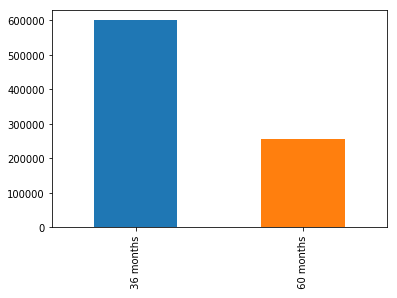

In [78]:
# term
term_count = df['term'].value_counts()
print(term_count)
term_count.plot.bar()

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64


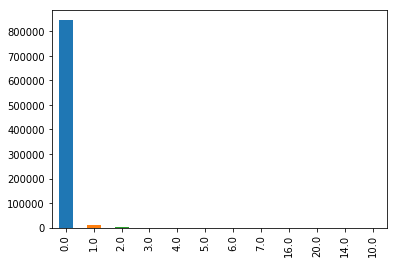

In [80]:

# collections_12_mths_ex_med
collections_12_mths_ex_med_count = df['collections_12_mths_ex_med'].value_counts()
print(collections_12_mths_ex_med_count)
collections_12_mths_ex_med_count.plot.bar()